In [3]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt
from cnn_resnet50 import class_counts_specifications, read_data
%matplotlib inline



Using Theano backend.


In [4]:
data = np.load('../data/flowers_224.npz')
x, y = read_data(data)
flower_count_df, class_labels = class_counts_specifications(y)
sorted_df = flower_count_df.sort_values('species', axis=0, ascending=True)
sorted_names = sorted_df.index.tolist()

In [5]:
N = len(sorted_df)
cat_counts = tuple(sorted_df['species'].values.tolist())

In [6]:
ind = np.arange(N)  # the x locations for the groups
width = 0.5       # the width of the bars

In [7]:
def beautify_name(name):
    name = name.replace("_", " ")
    name = name[0][0].upper() + name[1:]
    return name

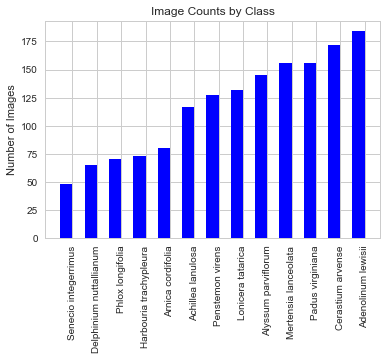

In [8]:
fig, ax = plt.subplots()
rects1 = ax.bar(ind, cat_counts, width, color='b')
# add some text for labels, title and axes ticks
ax.set_ylabel('Number of Images')
ax.set_title('Image Counts by Class')
ax.set_xticks(ind + width / 2)
class_labels_nice = []
for name in sorted_names:
    name = beautify_name(name)
    class_labels_nice.append(name)
    
ax.set_xticklabels(tuple(class_labels_nice), rotation='vertical')
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('flower_classes_barchart.png', bbox_inches=extent.expanded(3, 3))

# ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


In [10]:
# women_means = (25, 32, 34, 20, 25)
# women_std = (3, 5, 2, 3, 3)
# rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)


In [11]:
# add some text for labels, title and axes ticks
# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.set_xticks(ind + width / 2)
# ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

# ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))

In [12]:
# def autolabel(rects):
#     """
#     Attach a text label above each bar displaying its height
#     """
#     for rect in rects:
#         height = rect.get_height()
#         ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                 '%d' % int(height),
#                 ha='center', va='bottom')

In [16]:
# autolabel(rects1)
# autolabel(rects2)

In [1]:
import seaborn as sns

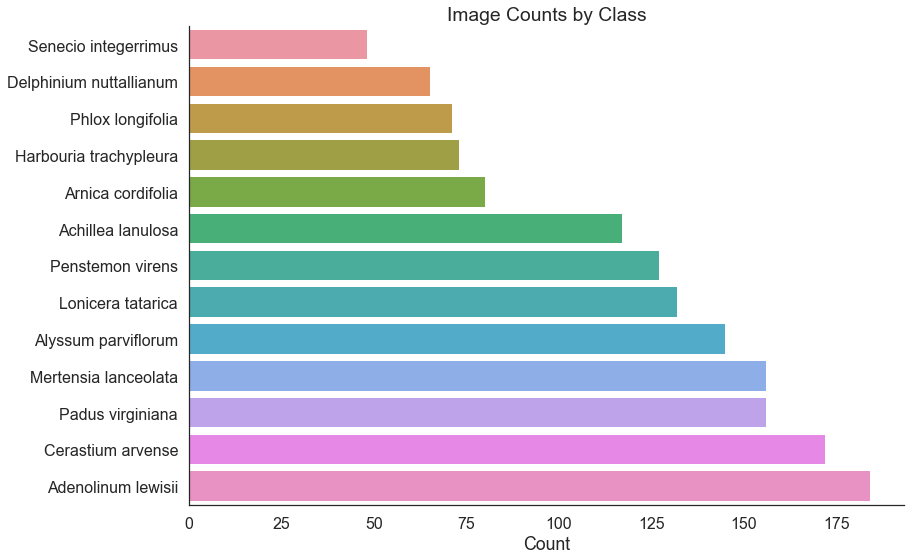

In [49]:
sns.set_style("white")
sns.set_context("poster")
plt.figure(figsize=(8, 6))
fig2, ax2 = plt.subplots()
class_labels_nice = []
for name in sorted_names:
    name = beautify_name(name)
    class_labels_nice.append(name)
sorted_df.index = class_labels_nice

# ax = sns.barplot(x = sorted_df.index.tolist(), y = sorted_df['species'], data=sorted_df)
# sorted_df['species'] = beautify_name(sorted_df['species'])
Count = sorted_df['species']
ax2 = sns.barplot(x = Count, y = sorted_df.index.tolist(), data=sorted_df)
ax2.set(xlabel='Count')
sns.plt.title('Image Counts by Class')

sns.despine()
# ax = sns.countplot(x = sorted_df.index.tolist(), data = sorted_df)
extent = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig2.savefig('flower_classes_barchart_h.png', bbox_inches=extent.expanded(2, 2))
# fig2.savefig('flower_classes_barchart_h.png')